<a href="https://colab.research.google.com/github/hal-yu/sqlite_database_operations/blob/main/sqlite_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import json
import matplotlib.pyplot as plt

## NY Presbyterian

### Loading Data

In [ ]:
# Fetch the data
nypdf = pd.read_json('NYPresbyterian.json')

In [ ]:
nypdf

,Code (CPT/DRG),Description,Rev Code,Inpatient/Outpatient,Gross Charges,Discounted Cash Price,Aetna,Cigna,Empire,Emblem,...,United Community Plan Medicaid/CHP,VNS Medicaid,Consumer Health Network,Devon,First Health,Magnacare,Multiplan/Beechstreet/PHCS,QHM,Minimum Negotiated Charge,Maximum Negotiated Charge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,648.000000,648.000000,449.064,388.152,492.48,838.2,...,296.511236,296.511236,294.4512,294.4512,294.4512,294.4512,294.4512,294.4512,253.048250,838.200000
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,243.000000,243.000000,168.399,145.557,184.68,838.2,...,749.246536,749.246536,110.4192,110.4192,110.4192,110.4192,110.4192,110.4192,51.903250,1873.116341
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1151.000000,1151.000000,797.643,689.449,874.76,838.2,...,296.511236,296.511236,523.0144,523.0144,523.0144,523.0144,523.0144,523.0144,253.048250,920.800000
3,96366,HC IV INFUSION THER/PROPH/DIAG EA ADDL HR,0260,Inpatient/Outpatient,316.000000,316.000000,218.988,189.284,240.16,838.2,...,749.246536,749.246536,143.5904,143.5904,143.5904,143.5904,143.5904,143.5904,51.903250,1873.116341
4,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,395.000000,395.000000,273.735,236.605,300.2,838.2,...,296.511236,296.511236,179.488,179.488,179.488,179.488,179.488,179.488,82.650750,838.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3502,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,100810.130844,100810.130844,50492.5742,75012.7374,22046.3005,67612.54412,...,16450.065,18917.57475,7445.299419,7445.299419,7445.299419,7445.299419,7445.299419,13982.55525,7445.299419,75012.737400
3503,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,95811.739740,95811.739740,33622.7962,49950.6714,52268.3686,45022.91332,...,10815.795674,12438.165025,4895.229122,4895.229122,4895.229122,4895.229122,4895.229122,9193.426323,4895.229122,57487.043844
3504,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,220700.448070,220700.448070,66802.7104,99243.3888,56723.429,89452.78144,...,26549.33,30531.7295,12016.226758,12016.226758,12016.226758,12016.226758,12016.226758,22566.9305,12016.226758,132420.268842
3505,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,96982.891120,96982.891120,34150.2284,50734.2348,14912.3268,45729.17624,...,8180.900261,9408.0353,3702.675458,3702.675458,3702.675458,3702.675458,3702.675458,6953.765222,3702.675458,58189.734672


In [168]:
nypdf = nypdf.round(2)

### Data Cleansing

In [169]:
# Check for Missing Values in Columns
missing_values = nypdf.isnull().sum()
print(missing_values)

codecptdrg                          0
description                         0
revcode                             0
inpatientoutpatient                 0
grosscharges                        0
discountedcashprice                 0
aetna                               0
cigna                               0
empire                              0
emblem                              0
united                              0
aetnamedicare                       0
agewellmedicare                     0
elderplanmedicare                   0
emblemmedicare                      0
empiremedicare                      0
fidelismedicare                     0
healthfirstmedicare                 0
uhccommunityplanunitedmedicare      0
vnsmedicare                         0
wellcaremedicare                    0
1199                                0
affinitymolinaessential             0
affinitymolinamedicaidchp           0
amidacaremedicaid                   0
emblemmedicaidchp                   0
empirehealth

In [170]:
import re
import numpy as np

In [171]:
# Function to remove white space and special characters from a value
def clean_column_names(data):
  def clean_name(value):
    cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', value)
    return cleaned_name.lower()

# Applying function for all columns
  data.columns = [clean_name(col) for col in data.columns]
  return data

nypdf = clean_column_names(nypdf)
nypdf

,codecptdrg,description,revcode,inpatientoutpatient,grosscharges,discountedcashprice,aetna,cigna,empire,emblem,...,unitedcommunityplanmedicaidchp,vnsmedicaid,consumerhealthnetwork,devon,firsthealth,magnacare,multiplanbeechstreetphcs,qhm,minimumnegotiatedcharge,maximumnegotiatedcharge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,648.00,648.00,449.064,388.152,492.48,838.2,...,296.511236,296.511236,294.4512,294.4512,294.4512,294.4512,294.4512,294.4512,253.05,838.20
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,243.00,243.00,168.399,145.557,184.68,838.2,...,749.246536,749.246536,110.4192,110.4192,110.4192,110.4192,110.4192,110.4192,51.90,1873.12
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1151.00,1151.00,797.643,689.449,874.76,838.2,...,296.511236,296.511236,523.0144,523.0144,523.0144,523.0144,523.0144,523.0144,253.05,920.80
3,96366,HC IV INFUSION THER/PROPH/DIAG EA ADDL HR,0260,Inpatient/Outpatient,316.00,316.00,218.988,189.284,240.16,838.2,...,749.246536,749.246536,143.5904,143.5904,143.5904,143.5904,143.5904,143.5904,51.90,1873.12
4,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,395.00,395.00,273.735,236.605,300.2,838.2,...,296.511236,296.511236,179.488,179.488,179.488,179.488,179.488,179.488,82.65,838.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3502,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,100810.13,100810.13,50492.5742,75012.7374,22046.3005,67612.54412,...,16450.065,18917.57475,7445.299419,7445.299419,7445.299419,7445.299419,7445.299419,13982.55525,7445.30,75012.74
3503,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,95811.74,95811.74,33622.7962,49950.6714,52268.3686,45022.91332,...,10815.795674,12438.165025,4895.229122,4895.229122,4895.229122,4895.229122,4895.229122,9193.426323,4895.23,57487.04
3504,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,220700.45,220700.45,66802.7104,99243.3888,56723.429,89452.78144,...,26549.33,30531.7295,12016.226758,12016.226758,12016.226758,12016.226758,12016.226758,22566.9305,12016.23,132420.27
3505,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,96982.89,96982.89,34150.2284,50734.2348,14912.3268,45729.17624,...,8180.900261,9408.0353,3702.675458,3702.675458,3702.675458,3702.675458,3702.675458,6953.765222,3702.68,58189.73


In [172]:
# Removing duplicate rows
nypdf.drop_duplicates(inplace=True)
nypdf

,codecptdrg,description,revcode,inpatientoutpatient,grosscharges,discountedcashprice,aetna,cigna,empire,emblem,...,unitedcommunityplanmedicaidchp,vnsmedicaid,consumerhealthnetwork,devon,firsthealth,magnacare,multiplanbeechstreetphcs,qhm,minimumnegotiatedcharge,maximumnegotiatedcharge
0,96360,HC IV INFUSION HYDRATION INITIAL 31 MIN-1HR,0260,Inpatient/Outpatient,648.00,648.00,449.064,388.152,492.48,838.2,...,296.511236,296.511236,294.4512,294.4512,294.4512,294.4512,294.4512,294.4512,253.05,838.20
1,96361,HC IV INFUSION HYDRATION FLUIDS ADDL HR,0260,Inpatient/Outpatient,243.00,243.00,168.399,145.557,184.68,838.2,...,749.246536,749.246536,110.4192,110.4192,110.4192,110.4192,110.4192,110.4192,51.90,1873.12
2,96365,HC IV INFUSION FOR THER/PROPH/DIAG INITIAL UP ...,0260,Inpatient/Outpatient,1151.00,1151.00,797.643,689.449,874.76,838.2,...,296.511236,296.511236,523.0144,523.0144,523.0144,523.0144,523.0144,523.0144,253.05,920.80
3,96366,HC IV INFUSION THER/PROPH/DIAG EA ADDL HR,0260,Inpatient/Outpatient,316.00,316.00,218.988,189.284,240.16,838.2,...,749.246536,749.246536,143.5904,143.5904,143.5904,143.5904,143.5904,143.5904,51.90,1873.12
4,96367,HC IV INF THER/PROPH/DIAG ADDL SEQ NEW DRUG UP...,0260,Inpatient/Outpatient,395.00,395.00,273.735,236.605,300.2,838.2,...,296.511236,296.511236,179.488,179.488,179.488,179.488,179.488,179.488,82.65,838.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3502,982,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,100810.13,100810.13,50492.5742,75012.7374,22046.3005,67612.54412,...,16450.065,18917.57475,7445.299419,7445.299419,7445.299419,7445.299419,7445.299419,13982.55525,7445.30,75012.74
3503,983,EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIP...,Multiple,Inpatient,95811.74,95811.74,33622.7962,49950.6714,52268.3686,45022.91332,...,10815.795674,12438.165025,4895.229122,4895.229122,4895.229122,4895.229122,4895.229122,9193.426323,4895.23,57487.04
3504,987,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,220700.45,220700.45,66802.7104,99243.3888,56723.429,89452.78144,...,26549.33,30531.7295,12016.226758,12016.226758,12016.226758,12016.226758,12016.226758,22566.9305,12016.23,132420.27
3505,988,NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRI...,Multiple,Inpatient,96982.89,96982.89,34150.2284,50734.2348,14912.3268,45729.17624,...,8180.900261,9408.0353,3702.675458,3702.675458,3702.675458,3702.675458,3702.675458,6953.765222,3702.68,58189.73


### Analysis and Statistics

In [174]:
nypdf.columns

Index(['codecptdrg', 'description', 'revcode', 'inpatientoutpatient',
       'grosscharges', 'discountedcashprice', 'aetna', 'cigna', 'empire',
       'emblem', 'united', 'aetnamedicare', 'agewellmedicare',
       'elderplanmedicare', 'emblemmedicare', 'empiremedicare',
       'fidelismedicare', 'healthfirstmedicare',
       'uhccommunityplanunitedmedicare', 'vnsmedicare', 'wellcaremedicare',
       '1199', 'affinitymolinaessential', 'affinitymolinamedicaidchp',
       'amidacaremedicaid', 'emblemmedicaidchp', 'empirehealthplusessential',
       'empirehealthplusexchange', 'empirehealthplusmedicaidchp',
       'fidelisessentialexchange', 'fidelismedicaidchp',
       'healthfirstessentialexchange', 'healthfirstmedicaidchp',
       'unitedcommunityplanessential', 'unitedcommunityplanmedicaidchp',
       'vnsmedicaid', 'consumerhealthnetwork', 'devon', 'firsthealth',
       'magnacare', 'multiplanbeechstreetphcs', 'qhm',
       'minimumnegotiatedcharge', 'maximumnegotiatedcharge'],
      

In [175]:
# Group by 'codecptdrg' and get the average (or sum) 'grosscharges'
grouped = nypdf.groupby('revcode').grosscharges.mean().sort_values(ascending=False)
grouped

revcode
Multiple    100854.228262
0360         24068.040268
0208         19125.000000
0202         15450.000000
0172         15450.000000
                ...      
0387           116.000000
0307            77.200000
0918            39.000000
0344            34.000000
0319            15.000000
Name: grosscharges, Length: 113, dtype: float64

In [176]:
# Calculate mean, median, and mode of gross charges
mean_value_grosscharges = nypdf['grosscharges'].mean()
median_value_grosscharges = nypdf['grosscharges'].median()
mode_value_grosscharges = nypdf['grosscharges'].mode().iloc[0]

# Calculatre variance and standard deviation for gross charges
variance_sd = np.var(nypdf['grosscharges'])
std_deviation_sd = np.std(nypdf['grosscharges'])

# Calculate percentiles for gross charges
percentile_25_grosscharges = np.percentile(nypdf['grosscharges'], 25)
percentile_75_grosscharges = np.percentile(nypdf['grosscharges'], 75)

# Calculate range for gross charges
data_age_range = nypdf['grosscharges'].max() - nypdf['grosscharges'].min()

# Print results
print("Mean Sleep Duration:", mean_value_grosscharges)
print("Median Heart Rate:", median_value_grosscharges)
print("Mode Stress Level:", mode_value_grosscharges)
print("Variance Sleep Duration:", variance_sd)
print("Standard Deviation Sleep Duration:", std_deviation_sd)
print("25th Percentile Stress:", percentile_25_grosscharges)
print("75th Percentile Stress:", percentile_75_grosscharges)
print("Data Range (Age):", data_age_range)

Mean Sleep Duration: 23412.91869689193
Median Heart Rate: 2030.0
Mode Stress Level: 876.0
Variance Sleep Duration: 3014743757.532502
Standard Deviation Sleep Duration: 54906.682266664975
25th Percentile Stress: 345.5
75th Percentile Stress: 24340.0
Data Range (Age): 1080072.3


In [177]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [178]:
nypdf.dtypes

codecptdrg                         object
description                        object
revcode                            object
inpatientoutpatient                object
grosscharges                      float64
discountedcashprice               float64
aetna                              object
cigna                              object
empire                             object
emblem                             object
united                             object
aetnamedicare                      object
agewellmedicare                    object
elderplanmedicare                  object
emblemmedicare                     object
empiremedicare                     object
fidelismedicare                    object
healthfirstmedicare                object
uhccommunityplanunitedmedicare     object
vnsmedicare                        object
wellcaremedicare                   object
1199                               object
affinitymolinaessential            object
affinitymolinamedicaidchp         

In [179]:
# Perform multiple imputation
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(nypdf[["grosscharges", "discountedcashprice", "minimumnegotiatedcharge", "maximumnegotiatedcharge"]])

# Create a Dataframe with imputed values
imputed_nypdf = pd.DataFrame(imputed_data, columns=["grosscharges", "discountedcashprice", "minimumnegotiatedcharge", "maximumnegotiatedcharge"])

# Combine imputed values with original dataset
revcode_nypdf = pd.concat([nypdf["revcode"], imputed_nypdf], axis =1)

print("\nDataFrame with Imputed Values:")
print(revcode_nypdf)


DataFrame with Imputed Values:
       revcode  grosscharges  discountedcashprice  minimumnegotiatedcharge  \
0         0260        648.00               648.00                   253.05   
1         0260        243.00               243.00                    51.90   
2         0260       1151.00              1151.00                   253.05   
3         0260        316.00               316.00                    51.90   
4         0260        395.00               395.00                    82.65   
...        ...           ...                  ...                      ...   
3502  Multiple     100810.13            100810.13                  7445.30   
3503  Multiple      95811.74             95811.74                  4895.23   
3504  Multiple     220700.45            220700.45                 12016.23   
3505  Multiple      96982.89             96982.89                  3702.68   
3506  Multiple      44172.93             44172.93                  2919.81   

      maximumnegotiatedcharge  

In [180]:
revcode_nypdf.describe()

,grosscharges,discountedcashprice,minimumnegotiatedcharge,maximumnegotiatedcharge
count,3.507000e+03,3.507000e+03,3507.000000,3.507000e+03
mean,2.341292e+04,2.341292e+04,1910.371783,1.987259e+04
std,5.491451e+04,5.491451e+04,4233.379262,4.988902e+04
min,2.000000e+00,2.000000e+00,0.720000,1.390000e+00
25%,3.455000e+02,3.455000e+02,72.910000,4.567500e+02
50%,2.030000e+03,2.030000e+03,344.440000,2.579350e+03
75%,2.434000e+04,2.434000e+04,2081.500000,1.546230e+04
max,1.080074e+06,1.080074e+06,79976.140000,1.049553e+06


## MountSinai

### Load Data

In [181]:
msdf = pd.read_excel('MountSinai.xlsx')

In [182]:
msdf

,Charge Description,Long Description,Billing Code,Revenue Code / DRG Type,Gross Charge,Cash Price,AETNA BETTER HEALTH (MEDICAID),AETNA COMMERCIAL,AETNA INTERNATIONAL,AETNA MEDICARE,...,UNITED HEALTHCARE,UNITED HEALTHCARE MEDICARE / MEDICA / PREFERRED CARE PARTNERS,UNITED HEALTHCARE OPTIONS PPO,UNITED HEALTHCARE MEDICAID,WELLCARE MEDICAID,WELLCARE MEDICARE,WORKERS COMP,WW CONCIERGE,Maximum Negotiated Charge,Minimum Negotiated Charge
0,HC BRIDGE ASSESSMENT,Psychiatric diagnostic evaluation\n,90791,513,156.000000,175,10.920,46.800000,132.600000,21.840000,...,32.760000,20.280000,34.320000,10.920,10.920,17.160000,117.000000,78.000000,132.600000,10.920000
1,HC PSYCHIATRIC DIAGNOSTIC EVALUATION,Psychiatric diagnostic evaluation\n,90791,900,327.600000,315,22.932,98.280000,278.460000,45.864000,...,68.796000,42.588000,72.072000,22.932,22.932,36.036000,245.700000,163.800000,278.460000,22.932000
2,HC PSYCHIATRIC DIAGNOSTIC EVALUATION W/ MEDICA...,Psychiatric diagnostic evaluation with medical...,90792,900,327.600000,315,22.932,98.280000,278.460000,45.864000,...,68.796000,42.588000,72.072000,22.932,22.932,36.036000,245.700000,163.800000,278.460000,22.932000
3,HC ELECTROCONVULSIVE THERAPY,Electroconvulsive therapy (includes necessary ...,90870,901,1154.400000,577.2,80.808,346.320000,981.240000,161.616000,...,242.424000,150.072000,253.968000,80.808,80.808,126.984000,865.800000,577.200000,981.240000,80.808000
4,HC PSYCH TREATMENT & EDUCATION,Training and educational services related to t...,G0177,942,166.400000,83.2,11.648,49.920000,141.440000,23.296000,...,34.944000,21.632000,36.608000,11.648,11.648,18.304000,124.800000,83.200000,141.440000,11.648000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572,Extensive O.R. procedure unrelated to principa...,Extensive O.R. procedure unrelated to principa...,981,MS,176654.394366,110622.909091,NaN,52996.318310,150156.235211,24731.615211,...,37097.422817,22965.071268,38863.966761,NaN,NaN,19431.983380,132490.795775,88327.197183,150156.235211,14132.351549
3573,Extensive O.R. procedure unrelated to principa...,Extensive O.R. procedure unrelated to principa...,982,MS,105720.700000,33313.777778,NaN,31716.210000,89862.595000,14800.898000,...,22201.347000,13743.691000,23258.554000,NaN,NaN,11629.277000,79290.525000,52860.350000,89862.595000,8457.656000
3574,Extensive O.R. procedure unrelated to principa...,Extensive O.R. procedure unrelated to principa...,983,MS,45953.375000,23374.75,NaN,13786.012500,39060.368750,6433.472500,...,9650.208750,5973.938750,10109.742500,NaN,NaN,5054.871250,34465.031250,22976.687500,39060.368750,3676.270000
3575,Non-extensive O.R. proc unrelated to principal...,Non-extensive O.R. proc unrelated to principal...,987,MS,196679.153846,44923.2,NaN,59003.746154,167177.280769,27535.081538,...,41302.622308,25568.290000,43269.413846,NaN,NaN,21634.706923,147509.365385,98339.576923,167177.280769,15734.332308


In [183]:
msdf = msdf.round(2)

### Data Cleansing

In [184]:
# Check for Missing Values in Columns
missing_values = msdf.isnull().sum()
print(missing_values)

Charge Description                                                 0
Long Description                                                   0
Billing Code                                                     729
Revenue Code / DRG Type                                            0
Gross Charge                                                       0
Cash Price                                                         0
AETNA BETTER HEALTH (MEDICAID)                                   572
AETNA COMMERCIAL                                                 270
AETNA INTERNATIONAL                                              270
AETNA MEDICARE                                                   270
AMBETTER                                                         270
AMERIGROUP                                                         0
BEECH STREET                                                     270
BCBS HEALTH OPTIONS HMO                                          270
BCBS MEDICARE PPO                 

In [185]:
# Function to remove white space and special characters from a value
def clean_column_names(data):
  def clean_name(value):
    cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', value)
    return cleaned_name.lower()

# Applying function for all columns
  data.columns = [clean_name(col) for col in data.columns]
  return data

msdf = clean_column_names(msdf)
msdf

,chargedescription,longdescription,billingcode,revenuecodedrgtype,grosscharge,cashprice,aetnabetterhealthmedicaid,aetnacommercial,aetnainternational,aetnamedicare,...,unitedhealthcare,unitedhealthcaremedicaremedicapreferredcarepartners,unitedhealthcareoptionsppo,unitedhealthcaremedicaid,wellcaremedicaid,wellcaremedicare,workerscomp,wwconcierge,maximumnegotiatedcharge,minimumnegotiatedcharge
0,HC BRIDGE ASSESSMENT,Psychiatric diagnostic evaluation\n,90791,513,156.00,175,10.92,46.80,132.60,21.84,...,32.76,20.28,34.32,10.92,10.92,17.16,117.00,78.00,132.60,10.92
1,HC PSYCHIATRIC DIAGNOSTIC EVALUATION,Psychiatric diagnostic evaluation\n,90791,900,327.60,315,22.93,98.28,278.46,45.86,...,68.80,42.59,72.07,22.93,22.93,36.04,245.70,163.80,278.46,22.93
2,HC PSYCHIATRIC DIAGNOSTIC EVALUATION W/ MEDICA...,Psychiatric diagnostic evaluation with medical...,90792,900,327.60,315,22.93,98.28,278.46,45.86,...,68.80,42.59,72.07,22.93,22.93,36.04,245.70,163.80,278.46,22.93
3,HC ELECTROCONVULSIVE THERAPY,Electroconvulsive therapy (includes necessary ...,90870,901,1154.40,577.2,80.81,346.32,981.24,161.62,...,242.42,150.07,253.97,80.81,80.81,126.98,865.80,577.20,981.24,80.81
4,HC PSYCH TREATMENT & EDUCATION,Training and educational services related to t...,G0177,942,166.40,83.2,11.65,49.92,141.44,23.30,...,34.94,21.63,36.61,11.65,11.65,18.30,124.80,83.20,141.44,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572,Extensive O.R. procedure unrelated to principa...,Extensive O.R. procedure unrelated to principa...,981,MS,176654.39,110622.909091,NaN,52996.32,150156.24,24731.62,...,37097.42,22965.07,38863.97,NaN,NaN,19431.98,132490.80,88327.20,150156.24,14132.35
3573,Extensive O.R. procedure unrelated to principa...,Extensive O.R. procedure unrelated to principa...,982,MS,105720.70,33313.777778,NaN,31716.21,89862.60,14800.90,...,22201.35,13743.69,23258.55,NaN,NaN,11629.28,79290.52,52860.35,89862.60,8457.66
3574,Extensive O.R. procedure unrelated to principa...,Extensive O.R. procedure unrelated to principa...,983,MS,45953.38,23374.75,NaN,13786.01,39060.37,6433.47,...,9650.21,5973.94,10109.74,NaN,NaN,5054.87,34465.03,22976.69,39060.37,3676.27
3575,Non-extensive O.R. proc unrelated to principal...,Non-extensive O.R. proc unrelated to principal...,987,MS,196679.15,44923.2,NaN,59003.75,167177.28,27535.08,...,41302.62,25568.29,43269.41,NaN,NaN,21634.71,147509.37,98339.58,167177.28,15734.33


In [186]:
# Drop rows with any missing values
msdf.dropna(inplace=True)
msdf

,chargedescription,longdescription,billingcode,revenuecodedrgtype,grosscharge,cashprice,aetnabetterhealthmedicaid,aetnacommercial,aetnainternational,aetnamedicare,...,unitedhealthcare,unitedhealthcaremedicaremedicapreferredcarepartners,unitedhealthcareoptionsppo,unitedhealthcaremedicaid,wellcaremedicaid,wellcaremedicare,workerscomp,wwconcierge,maximumnegotiatedcharge,minimumnegotiatedcharge
0,HC BRIDGE ASSESSMENT,Psychiatric diagnostic evaluation\n,90791,513,156.00,175,10.92,46.80,132.60,21.84,...,32.76,20.28,34.32,10.92,10.92,17.16,117.00,78.00,132.60,10.92
1,HC PSYCHIATRIC DIAGNOSTIC EVALUATION,Psychiatric diagnostic evaluation\n,90791,900,327.60,315,22.93,98.28,278.46,45.86,...,68.80,42.59,72.07,22.93,22.93,36.04,245.70,163.80,278.46,22.93
2,HC PSYCHIATRIC DIAGNOSTIC EVALUATION W/ MEDICA...,Psychiatric diagnostic evaluation with medical...,90792,900,327.60,315,22.93,98.28,278.46,45.86,...,68.80,42.59,72.07,22.93,22.93,36.04,245.70,163.80,278.46,22.93
3,HC ELECTROCONVULSIVE THERAPY,Electroconvulsive therapy (includes necessary ...,90870,901,1154.40,577.2,80.81,346.32,981.24,161.62,...,242.42,150.07,253.97,80.81,80.81,126.98,865.80,577.20,981.24,80.81
4,HC PSYCH TREATMENT & EDUCATION,Training and educational services related to t...,G0177,942,166.40,83.2,11.65,49.92,141.44,23.30,...,34.94,21.63,36.61,11.65,11.65,18.30,124.80,83.20,141.44,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,HC PHLEBOTOMY,"Phlebotomy, therapeutic (separate procedure)",99195,940,132.13,61.5,9.25,39.64,112.31,18.50,...,27.75,17.18,29.07,9.25,9.25,14.53,99.10,66.06,112.31,9.25
2724,HC CARDIAC REHAB PHASE I,Physician or other qualified health care profe...,93797,943,246.82,123.41,17.28,74.05,209.80,34.55,...,51.83,32.09,54.30,17.28,17.28,27.15,185.12,123.41,209.80,17.28
2725,HC CARDIAC REHAB PHASE 2,Physician or other qualified health care profe...,93798,943,474.48,237.24,33.21,142.34,403.31,66.43,...,99.64,61.68,104.39,33.21,33.21,52.19,355.86,237.24,403.31,33.21
2726,HC REM MNTR PHYSIOL PARAM INITIAL SETUP AND ED...,Remote monitoring of physiologic parameter(s) ...,99453,943,308.72,154.36,21.61,92.62,262.41,43.22,...,64.83,40.13,67.92,21.61,21.61,33.96,231.54,154.36,262.41,21.61


In [187]:
# Removing duplicate rows
msdf.drop_duplicates(inplace=True)
msdf

,chargedescription,longdescription,billingcode,revenuecodedrgtype,grosscharge,cashprice,aetnabetterhealthmedicaid,aetnacommercial,aetnainternational,aetnamedicare,...,unitedhealthcare,unitedhealthcaremedicaremedicapreferredcarepartners,unitedhealthcareoptionsppo,unitedhealthcaremedicaid,wellcaremedicaid,wellcaremedicare,workerscomp,wwconcierge,maximumnegotiatedcharge,minimumnegotiatedcharge
0,HC BRIDGE ASSESSMENT,Psychiatric diagnostic evaluation\n,90791,513,156.00,175,10.92,46.80,132.60,21.84,...,32.76,20.28,34.32,10.92,10.92,17.16,117.00,78.00,132.60,10.92
1,HC PSYCHIATRIC DIAGNOSTIC EVALUATION,Psychiatric diagnostic evaluation\n,90791,900,327.60,315,22.93,98.28,278.46,45.86,...,68.80,42.59,72.07,22.93,22.93,36.04,245.70,163.80,278.46,22.93
2,HC PSYCHIATRIC DIAGNOSTIC EVALUATION W/ MEDICA...,Psychiatric diagnostic evaluation with medical...,90792,900,327.60,315,22.93,98.28,278.46,45.86,...,68.80,42.59,72.07,22.93,22.93,36.04,245.70,163.80,278.46,22.93
3,HC ELECTROCONVULSIVE THERAPY,Electroconvulsive therapy (includes necessary ...,90870,901,1154.40,577.2,80.81,346.32,981.24,161.62,...,242.42,150.07,253.97,80.81,80.81,126.98,865.80,577.20,981.24,80.81
4,HC PSYCH TREATMENT & EDUCATION,Training and educational services related to t...,G0177,942,166.40,83.2,11.65,49.92,141.44,23.30,...,34.94,21.63,36.61,11.65,11.65,18.30,124.80,83.20,141.44,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,HC PHLEBOTOMY,"Phlebotomy, therapeutic (separate procedure)",99195,940,132.13,61.5,9.25,39.64,112.31,18.50,...,27.75,17.18,29.07,9.25,9.25,14.53,99.10,66.06,112.31,9.25
2724,HC CARDIAC REHAB PHASE I,Physician or other qualified health care profe...,93797,943,246.82,123.41,17.28,74.05,209.80,34.55,...,51.83,32.09,54.30,17.28,17.28,27.15,185.12,123.41,209.80,17.28
2725,HC CARDIAC REHAB PHASE 2,Physician or other qualified health care profe...,93798,943,474.48,237.24,33.21,142.34,403.31,66.43,...,99.64,61.68,104.39,33.21,33.21,52.19,355.86,237.24,403.31,33.21
2726,HC REM MNTR PHYSIOL PARAM INITIAL SETUP AND ED...,Remote monitoring of physiologic parameter(s) ...,99453,943,308.72,154.36,21.61,92.62,262.41,43.22,...,64.83,40.13,67.92,21.61,21.61,33.96,231.54,154.36,262.41,21.61


### Analysis and Statistics

In [188]:
msdf.columns

Index(['chargedescription', 'longdescription', 'billingcode',
       'revenuecodedrgtype', 'grosscharge', 'cashprice',
       'aetnabetterhealthmedicaid', 'aetnacommercial', 'aetnainternational',
       'aetnamedicare', 'ambetter', 'amerigroup', 'beechstreet',
       'bcbshealthoptionshmo', 'bcbsmedicareppo', 'bcbshealthoptionsmcr',
       'bcbsnetworkblue', 'bcbsppo', 'bcbsphstraditional', 'brighthealth',
       'brighthealthmedicare', 'careplusmedicare', 'cigna', 'corvel',
       'coventryfirsthealth', 'coventryppo', 'devotedhealthmedicare',
       'dimension', 'dimensioninternational', 'dimensionplus',
       'doctorshealthcaremedicare', 'healthsunmedicare', 'leonhealthmedicare',
       'longevityhealthmedicare', 'mmmofflmedicare', 'multiplanbeechstreet',
       'multiplanphcs', 'multiplan', 'pace', 'positivehealthcaremedicare',
       'positivehealthcaremedicaid', 'prestigehealthchoicemedicaid',
       'simplyhealthcaremedicare', 'simplyhealthcaremedicaid',
       'solishealthmedic

In [189]:
# Group by 'codecptdrg' and get the average (or sum) 'grosscharges'
grouped2 = msdf.groupby('revenuecodedrgtype').grosscharge.mean().sort_values(ascending=False)
grouped2

revenuecodedrgtype
360    49304.085000
481    22327.703393
361    14703.062667
616     8667.955000
480     8153.430455
           ...     
301       97.457297
302       90.267225
762       78.940000
412       58.780000
250       10.400000
Name: grosscharge, Length: 79, dtype: float64

In [190]:
# Calculate mean, median, and mode of gross charges
mean_value_grosscharges = msdf['grosscharge'].mean()
median_value_grosscharges = msdf['grosscharge'].median()
mode_value_grosscharges = msdf['grosscharge'].mode().iloc[0]

# Calculatre variance and standard deviation for gross charges
variance_sd = np.var(msdf['grosscharge'])
std_deviation_sd = np.std(msdf['grosscharge'])

# Calculate percentiles for gross charges
percentile_25_grosscharges = np.percentile(msdf['grosscharge'], 25)
percentile_75_grosscharges = np.percentile(msdf['grosscharge'], 75)

# Calculate range for gross charges
data_age_range = msdf['grosscharge'].max() - msdf['grosscharge'].min()

# Print results
print("Mean Sleep Duration:", mean_value_grosscharges)
print("Median Heart Rate:", median_value_grosscharges)
print("Mode Stress Level:", mode_value_grosscharges)
print("Variance Sleep Duration:", variance_sd)
print("Standard Deviation Sleep Duration:", std_deviation_sd)
print("25th Percentile Stress:", percentile_25_grosscharges)
print("75th Percentile Stress:", percentile_75_grosscharges)
print("Data Range (Age):", data_age_range)

Mean Sleep Duration: 1753.8667099350973
Median Heart Rate: 253.12
Mode Stress Level: 12.48
Variance Sleep Duration: 29634825.227082785
Standard Deviation Sleep Duration: 5443.787764698655
25th Percentile Stress: 62.4
75th Percentile Stress: 1049.905
Data Range (Age): 62035.14


In [191]:
# Perform multiple imputation
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(msdf[["grosscharge", "cashprice", "maximumnegotiatedcharge", "minimumnegotiatedcharge"]])

# Create a Dataframe with imputed values
imputed_msdf = pd.DataFrame(imputed_data, columns=["grosscharge", "cashprice", "maximumnegotiatedcharge", "minimumnegotiatedcharge"])

# Combine imputed values with original dataset
revcode_msdf = pd.concat([msdf["revenuecodedrgtype"], imputed_nypdf], axis =1)

print("\nDataFrame with Imputed Values:")
print(revcode_msdf)


DataFrame with Imputed Values:
     revenuecodedrgtype  grosscharges  discountedcashprice  \
0                   513        648.00               648.00   
1                   900        243.00               243.00   
2                   900       1151.00              1151.00   
3                   901        316.00               316.00   
4                   942        395.00               395.00   
...                 ...           ...                  ...   
3502                NaN     100810.13            100810.13   
3503                NaN      95811.74             95811.74   
3504                NaN     220700.45            220700.45   
3505                NaN      96982.89             96982.89   
3506                NaN      44172.93             44172.93   

      minimumnegotiatedcharge  maximumnegotiatedcharge  
0                      253.05                   838.20  
1                       51.90                  1873.12  
2                      253.05                   920.

## Visual Statistics

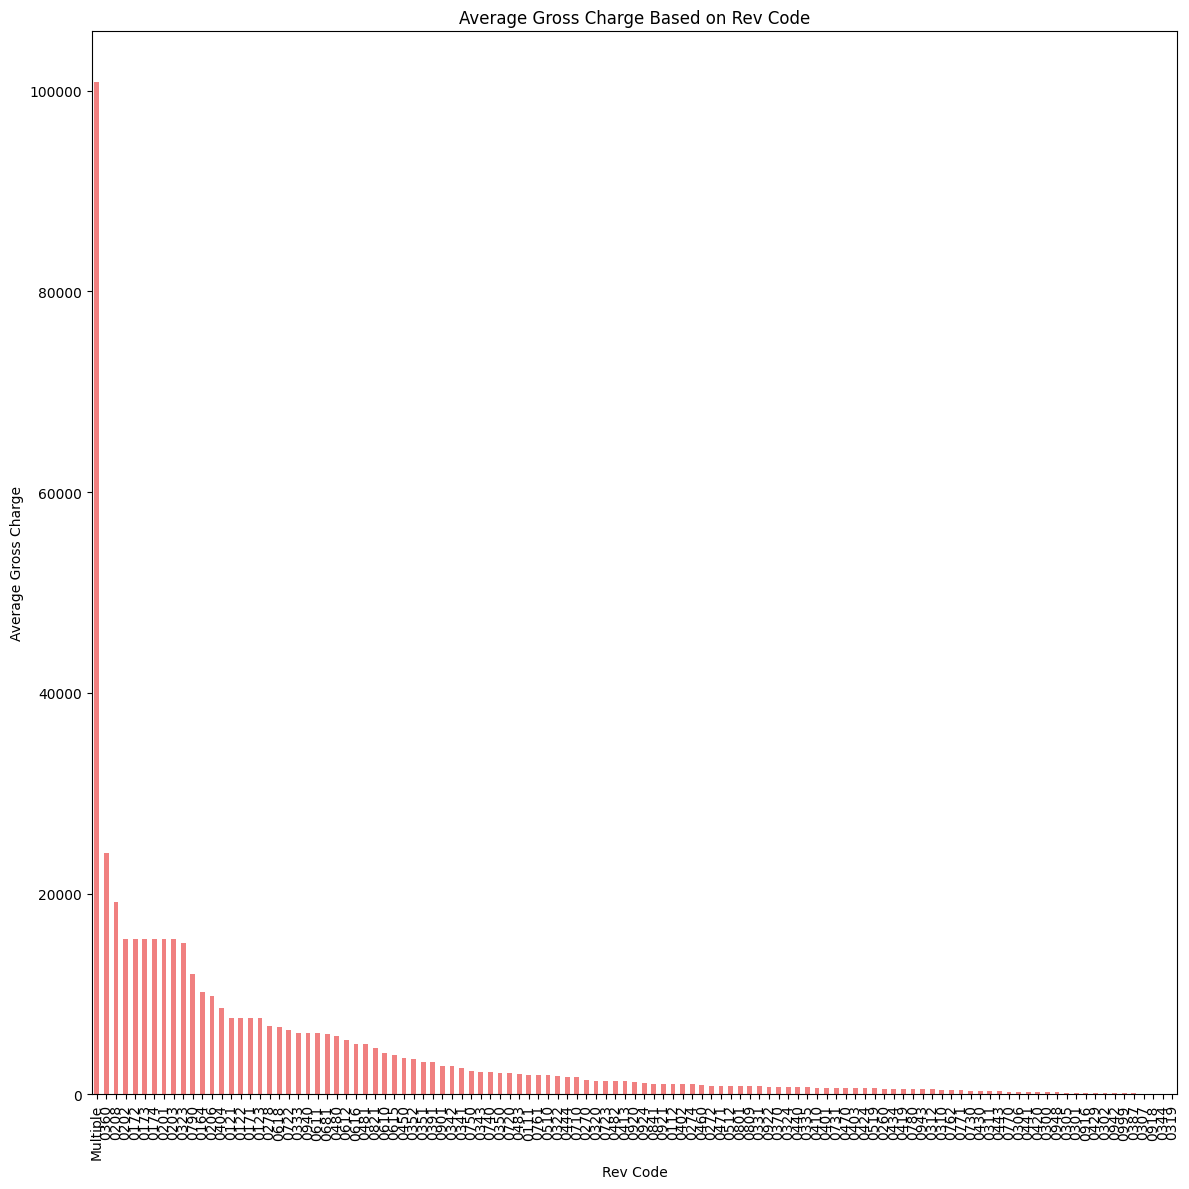

In [192]:
# Plotting for NY Presbyterian Gross Charge Based on Rev Code
plt.figure(figsize=(12, 12))
grouped.plot(kind='bar', color='lightcoral')
plt.ylabel('Average Gross Charge')
plt.xlabel('Rev Code')
plt.title('Average Gross Charge Based on Rev Code')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

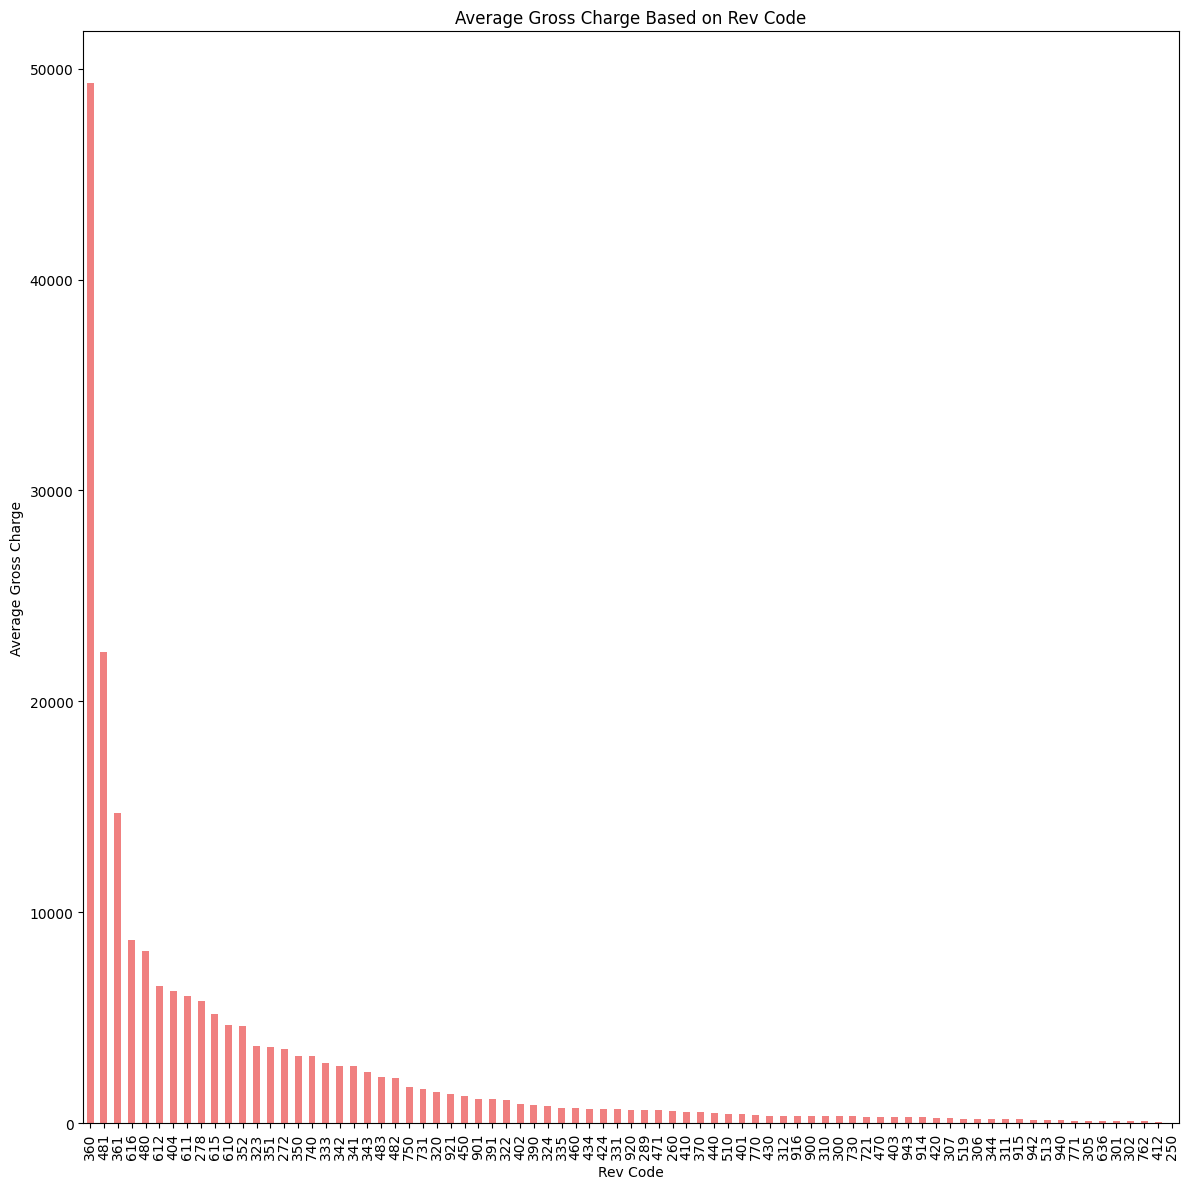

In [149]:
# Plotting for NY Presbyterian Gross Charge Based on Rev Code
plt.figure(figsize=(12, 12))
grouped2.plot(kind='bar', color='lightcoral')
plt.ylabel('Average Gross Charge')
plt.xlabel('Rev Code')
plt.title('Average Gross Charge Based on Rev Code')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [193]:
print (nypdf['description'].value_counts())

KNEE ARTHROSCOPY/SURGERY                                                         12
SHOULDER ARTHROSCOPY/SURGERY                                                      7
ANKLE ARTHROSCOPY/SURGERY                                                         6
CYSTOSCOPY AND TREATMENT                                                          6
TREAT HUMERUS FRACTURE                                                            6
                                                                                 ..
PLACE CATH THORACIC AORTA                                                         1
PLACE CATH CAROTID/INOM ART                                                       1
PLACE CATH CAROTD ART                                                             1
PLACE CATH VERTEBRAL ART                                                          1
NON-EXTENSIVE O.R. PROCEDURES UNRELATED TO PRINCIPAL DIAGNOSIS WITHOUT CC/MCC     1
Name: description, Length: 3419, dtype: int64


In [151]:
import ipywidgets as widgets

# Compute the average data value across all descriptions
avg_grosscharge_nypdf = nypdf['grosscharges'].mean()

# Sort the description in ascending order for the dropdown list
sorted_description_nypdf = sorted(nypdf['description'].unique())

# Interactive selection of county for visualization using ipywidgets
@widgets.interact(description=sorted_description_nypdf)
def plot_data(description):
    description_value = nypdf[nypdf['description'] == description]['grosscharges'].values[0]

    # Labels for bars
    labels = [description, 'Average across all descriptions']

    # Data values for bars
    values = [description_value, avg_grosscharge_nypdf]

    plt.figure(figsize=(8, 6))

    # Plot the bars
    colors = ['lightcoral', 'lightblue']
    plt.bar(labels, values, color=colors)

    plt.ylabel('Gross Charge')
    plt.title(f'Prevalence of {description} vs Average across all descriptions')

    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='description', options=('ABD PARACENTESIS W/IMAGING', 'ABDOMEN SURG…

In [194]:
print (msdf['chargedescription'].value_counts())

HC PHENOBARBITAL                                                               2
HC MR BRAIN W/WO CONTRAST                                                      2
HC 3D RENDERING W POST PROCESS                                                 2
HC C3 NEPHRITIC FACTOR                                                         2
HC PLACE DEVICE/MARKER, NON PROS                                               2
                                                                              ..
HC ANTIMYELOPEROX AB QT                                                        1
HC ANTI-MITOCHONDRIA AB                                                        1
HC C1Q                                                                         1
HC ANTICARDIOLIPIN AB                                                          1
HC REM MNTR PHYSIOL PARAM 1ST DEV SUPPLY  WITH DAILY RECORDINGS; EA 30 DAYS    1
Name: chargedescription, Length: 1995, dtype: int64


In [159]:
# Compute the average data value across all descriptions
avg_grosscharge_msdf = msdf['grosscharge'].mean()

# Sort the descriptions in ascending order for the dropdown list
sorted_description_msdf = sorted(msdf['chargedescription'].unique())

# Interactive selection of county for visualization using ipywidgets
@widgets.interact(descriptions=sorted_description_msdf)
def plot_data(descriptions):
    descriptions_value = msdf[msdf['chargedescription'] == descriptions]['grosscharge'].values[0]

    # Labels for bars
    labels = [descriptions, 'Average across all descriptions']

    # Data values for bars
    values = [descriptions_value, avg_grosscharge_msdf]

    plt.figure(figsize=(8, 6))

    # Plot the bars
    colors = ['lightcoral', 'lightblue']
    plt.bar(labels, values, color=colors)

    plt.ylabel('Gross Charge')
    plt.title(f'Prevalence of {descriptions} vs Average across all descriptions')

    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='descriptions', options=('HC 1-3 LEAD EKG TRACING ONLY', 'HC 17 HYD…

## SQLALCHEMY
1. Create a local SQLite database called health.db

2. Manual table creation: Manually create a table (schema) using CREATE TABLE SQL query. The table should contain at least 5 columns. Please have at least two columns be numerical columns, and two columns should be categorical (string) columns. Then write at least one INSERT INTO SQL query to populate 1 or 2 rows worth of fake data.

3. Automatic table creation: Implement the to_sql function from Pandas to take the example data from Part 1 of this assignment into the SQLite database.

In [196]:
from sqlalchemy import create_engine
import sqlite3

In [197]:
conn = sqlite3.connect('health.db')
c = conn.cursor()